In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
plt.rcParams['font.size'] = 10

In [4]:
plt.rcParams["legend.loc"] = "upper left"

In [5]:
df = pd.read_excel('C:/JupyterLab/AI_prediction/data/China_ml_models.xlsx')

In [6]:
df

,year,ml_models
0,2003,0
1,2004,0
2,2005,0
3,2006,0
4,2007,0
5,2008,0
6,2009,0
7,2010,0
8,2011,0
9,2012,0


In [7]:
df = df.set_index('year', drop=False)

In [8]:
xticks_labels = df.index.tolist()
xticks_filtered = [year for year in xticks_labels if year % 3 == 0]

([<matplotlib.axis.XTick at 0x1e2bc1d96a0>,
 [Text(2004, 0, '2004'),
  Text(2007, 0, '2007'),
  Text(2010, 0, '2010'),
  Text(2013, 0, '2013'),
  Text(2016, 0, '2016'),
  Text(2019, 0, '2019'),
  Text(2022, 0, '2022')])

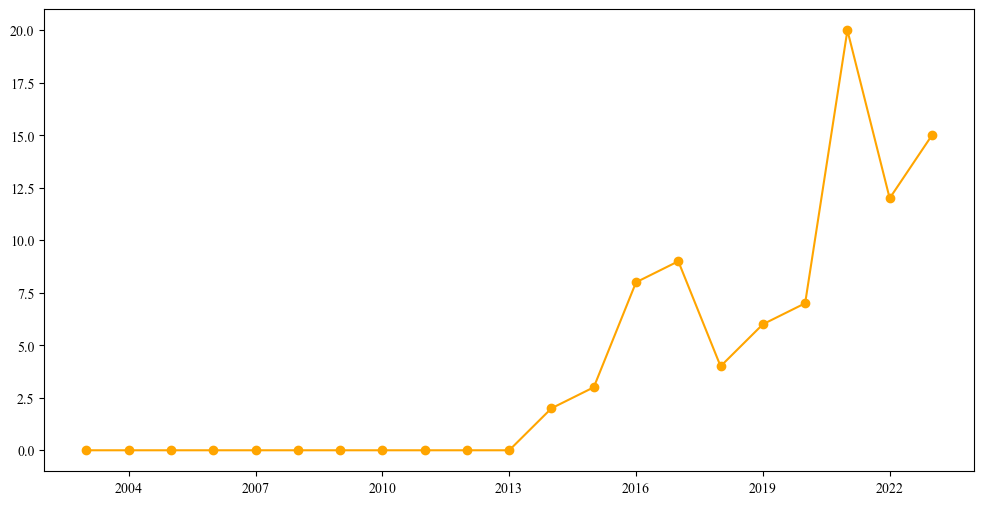

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['ml_models'], marker='o', color='orange', label='ml_models')
plt.xticks(xticks_filtered)

Significant machine learning models began to be developed in China only in 2014. Null values could have significantly contributed to poor model fit. In the first phase of model selection, the entire series and data from after 2014 were used, omitting null values at the beginning of the period under study. It was expected that omitting zero values would not artificially lower the model's expected values and would provide a more realistic forecast based on the trend over the past decade.

In [10]:
df_full = df.copy()  
df_nonzero = df[df["ml_models"] > 0].copy() 

In [11]:
df_nonzero

,year,ml_models
year,,
2014,2014,2
2015,2015,3
2016,2016,8
2017,2017,9
2018,2018,4
2019,2019,6
2020,2020,7
2021,2021,20
2022,2022,12


### Polymonial and linear regression comparison for two datasets

C:\Users\tester\AppData\Local\Temp\ipykernel_5496\2221950564.py:21: RuntimeWarning: divide by zero encountered in divide
  "MAPE": np.mean(np.abs((y - y_pred_linear) / y)) * 100,
C:\Users\tester\AppData\Local\Temp\ipykernel_5496\2221950564.py:28: RuntimeWarning: divide by zero encountered in divide
  "MAPE": np.mean(np.abs((y - y_pred_poly) / y)) * 100,


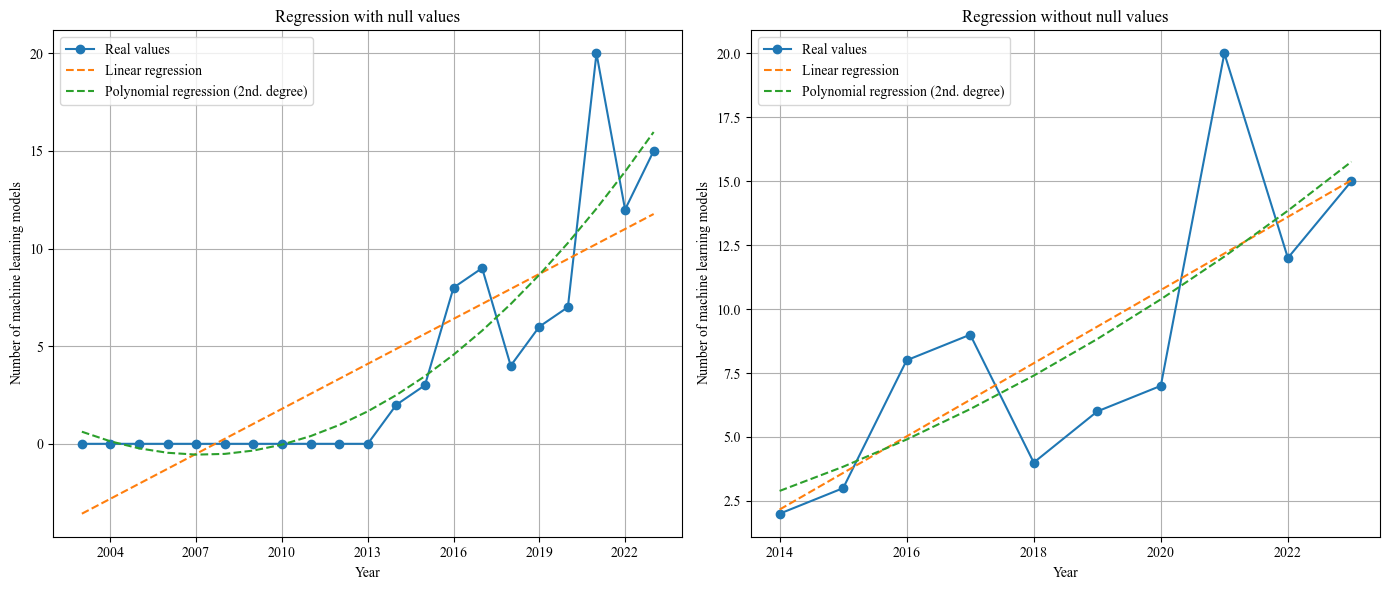

In [12]:
def train_and_predict(df, degree=2):
    X = df["year"].values.reshape(-1, 1)
    y = df["ml_models"].values

    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

     # Metrics
    metrics = {
        "linear": {
            "MSE": mean_squared_error(y, y_pred_linear),
            "RMSE": np.sqrt(mean_squared_error(y, y_pred_linear)),
            "MAE": mean_absolute_error(y, y_pred_linear),
            "MAPE": np.mean(np.abs((y - y_pred_linear) / y)) * 100,
            "R2": r2_score(y, y_pred_linear)
        },
        "polynomial": {
            "MSE": mean_squared_error(y, y_pred_poly),
            "RMSE": np.sqrt(mean_squared_error(y, y_pred_poly)),
            "MAE": mean_absolute_error(y, y_pred_poly),
            "MAPE": np.mean(np.abs((y - y_pred_poly) / y)) * 100,
            "R2": r2_score(y, y_pred_poly)
        }
    }

    return {
        "X": X,
        "y": y,
        "linear_pred": y_pred_linear,
        "poly_pred": y_pred_poly,
        "metrics": metrics,
        "linear_model": linear_model,
        "poly_model": poly_model,
        "poly_features": poly
    }

results_full = train_and_predict(df_full)
results_nonzero = train_and_predict(df_nonzero)
plt.figure(figsize=(14, 6))

# Plot for data with zeros
plt.subplot(1, 2, 1)
plt.plot(df_full["year"], df_full["ml_models"], "o-", label="Real values")
plt.plot(df_full["year"], results_full["linear_pred"], "--", label="Linear regression")
plt.plot(df_full["year"], results_full["poly_pred"], "--", label="Polynomial regression (2nd. degree)")
plt.xticks(xticks_filtered)
plt.title("Regression with null values")
plt.xlabel("Year")
plt.ylabel("Number of machine learning models")
plt.legend()
plt.grid(True)

# Plot for data without zeros
plt.subplot(1, 2, 2)
plt.plot(df_nonzero["year"], df_nonzero["ml_models"], "o-", label="Real values")
plt.plot(df_nonzero["year"], results_nonzero["linear_pred"], "--", label="Linear regression")
plt.plot(df_nonzero["year"], results_nonzero["poly_pred"], "--", label="Polynomial regression (2nd. degree)")
plt.title("Regression without null values")
plt.xlabel("Year")
plt.ylabel("Number of machine learning models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


For a limited time series, the linear and polynomial regression lines almost coincide. As a result of estimating the model based on the entire time series, illogical results were obtained, because the expected values for the initial years are lower than zero. Despite the high values of regression errors from model based on a limited time series, the prediction was made on a shorter time series.

In [13]:
def create_results_table(results_dict, dataset_name):
    data = results_dict["metrics"]
    results = pd.DataFrame({
        "Model": ["Linear Regression", "Polynomial Regression (2nd degree)"],
        "MSE": [data["linear"]["MSE"], data["polynomial"]["MSE"]],
        "RMSE": [data["linear"]["RMSE"], data["polynomial"]["RMSE"]],
        "MAE": [data["linear"]["MAE"], data["polynomial"]["MAE"]],
        "R²": [data["linear"]["R2"], data["polynomial"]["R2"]],
        "MAPE": [data["linear"]["MAPE"], data["polynomial"]["MAPE"]]
    }).apply(pd.to_numeric, errors="ignore").round(3)

    print(f"\n=== {dataset_name} ===")
    display(
        results.style
        .format({
            "MSE": "{:.3f}",
            "RMSE": "{:.3f}",
            "MAE": "{:.3f}",
            "R²": "{:.3f}",
            "MAPE": "{:.3f}"
        })
        .hide(axis="index")
    )

create_results_table(results_full, "Data with null values")
create_results_table(results_nonzero, "Data without null values")


=== Data with null values ===


C:\Users\tester\AppData\Local\Temp\ipykernel_5496\2405918274.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  }).apply(pd.to_numeric, errors="ignore").round(3)


Model,MSE,RMSE,MAE,R²,MAPE
Linear Regression,10.581,3.253,2.634,0.671,inf
Polynomial Regression (2nd degree),5.883,2.425,1.595,0.817,inf



=== Data without null values ===


C:\Users\tester\AppData\Local\Temp\ipykernel_5496\2405918274.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  }).apply(pd.to_numeric, errors="ignore").round(3)


Model,MSE,RMSE,MAE,R²,MAPE
Linear Regression,11.962,3.459,2.669,0.585,35.209
Polynomial Regression (2nd degree),11.768,3.431,2.790,0.592,38.417


Based on the results, the fit of both models was considered average; however, the high fluctuations in values and the use of a limited sample of all values significantly impacted the ability to obtain low errors. The coefficient of determination for the linear model was 0.585, meaning it explained slightly more than half of the data variability. The MAPE percentage error was 35.2%, indicating a significant discrepancy between the estimated values and the actual data. The second-degree polynomial regression performed very similarly, yielding a slightly better fit.

Conducting a forecast based on the training set was abandoned due to the limited length of the available time series. Furthermore, in the case of China, there was no decline in the number of key AI models developed in 2020, which limited the feasibility of constructing an alternative forecasting scenario.

### Polynomial regression forecast

In [14]:
future_years = np.array([2024, 2025, 2026, 2027]).reshape(-1, 1)
X_train = results_nonzero["X"]
poly = results_nonzero["poly_features"]
poly_model = results_nonzero["poly_model"]

# Polynomial transformation
future_years_poly = poly.transform(future_years)

future_preds = poly_model.predict(future_years_poly)

In [15]:
residuals = df_nonzero['ml_models'] - results_nonzero["poly_pred"]
res_var = np.var(residuals)
se = np.sqrt(res_var)

z = 1.96
ci_upper = future_preds + z * se
ci_lower = future_preds - z * se

In [16]:
forecast_steps = 4
z = 1.96
se_steps = [np.sqrt(res_var * h) for h in range(1, forecast_steps + 1)]
lower_bound = future_preds - z * np.array(se_steps)
upper_bound = future_preds + z * np.array(se_steps)

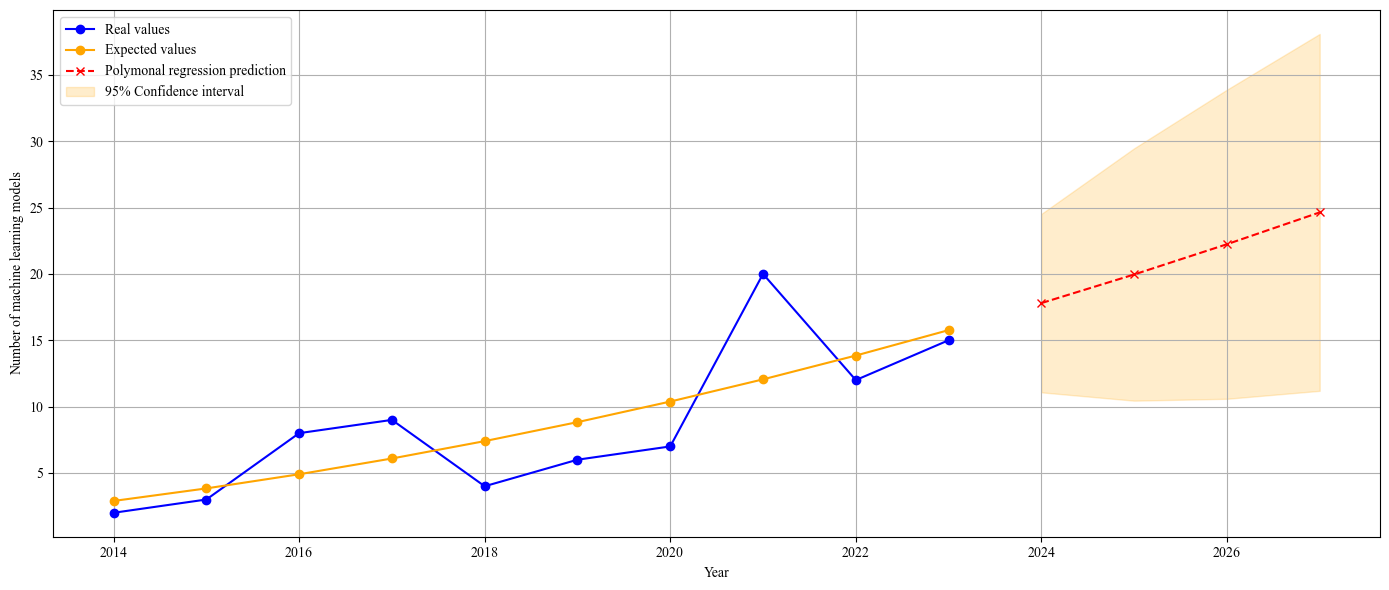

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(df_nonzero["year"], df_nonzero["ml_models"], "o-", label="Real values", color="blue")
plt.plot(df_nonzero["year"], results_nonzero["poly_pred"], "o-", label="Expected values", color="orange")
plt.plot(future_years.flatten(), future_preds, label="Polymonal regression prediction", marker='x', linestyle='--', color='red')
plt.fill_between(future_years.flatten(), lower_bound, upper_bound, label='95% Confidence interval', color='orange', alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Number of machine learning models")
plt.xticks(np.arange(2014, 2028, 2))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
future_preds

array([17.8       , 19.95757576, 22.23636364, 24.63636364])

The average annual growth rate over the forecast period was nearly 11.5%, significantly higher than for the United States. However, it is important to note that the significantly limited number of observations for China makes it difficult to make a realistic forecast, as reflected in the very wide confidence intervals.

### Summary for China prediction

Despite the formal accuracy of the estimation, the model estimated only a simple linear trend, ignoring the observed irregularity, growth dynamics, and sudden jumps in values. As a result, the forecasted values ​​were monotonic and did not differ significantly from the forecast made by polynomial regression. The series tested proved to be too short and irregular to allow for a reliable forecast.